In [14]:
import numpy as np
import matplotlib.pyplot as plt
from amuse.units import units, constants

# We define some properties for the figures
import matplotlib as mpl
SMALL_SIZE = 10 * 2 
MEDIUM_SIZE = 12 * 2
BIGGER_SIZE = 14 * 2

plt.rc('text', usetex=True)
plt.rc('axes', titlesize=SMALL_SIZE)                     # fontsize of the axes title\n",
plt.rc('axes', labelsize=MEDIUM_SIZE)                    # fontsize of the x and y labels\n",
plt.rc('xtick', labelsize=SMALL_SIZE, direction='out')   # fontsize of the tick labels\n",
plt.rc('ytick', labelsize=SMALL_SIZE, direction='out')   # fontsize of the tick labels\n",
plt.rc('legend', fontsize=SMALL_SIZE)                    # legend fontsize\n",
mpl.rcParams['axes.titlesize'] = BIGGER_SIZE
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.family'] = 'STIXgeneral'

mpl.rcParams['figure.dpi'] = 100

mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['ytick.minor.size'] = 4

mpl.rcParams['xtick.major.width'] = 1.25
mpl.rcParams['ytick.major.width'] = 1.25
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.minor.width'] = 1


In [2]:
# TO DO: MAKE A FILE WITH THESE PARAMETERS WHICH YOU CAN IMPORT FROM ANY NOTEBOOK
# ALSO MAKE THE NAMES BETTER BECAUSE THESE SUCK

SMBH_ORBITAL_RADIUS = 44 * 1e-3 | units.parsec
SMBH_ECCENTRICITY = 0.32

PRIMARY_MASS = 2.8 | units.MSun
SECONDARY_MASS = 0.73 | units.MSun

BINARY_SEPARATION = 1.59 | units.AU
BINARY_INCLINATION = 102.55 | units.deg
BINARY_ECCENTRICITY = 0.45
BINARY_PERIAPSE = 311.75 | units.deg


SMBH_MASS = 4.297e6 | units.MSun

DISK_MASS = 1.16e-6 | units.MSun


6.55197565111 13.3586133863


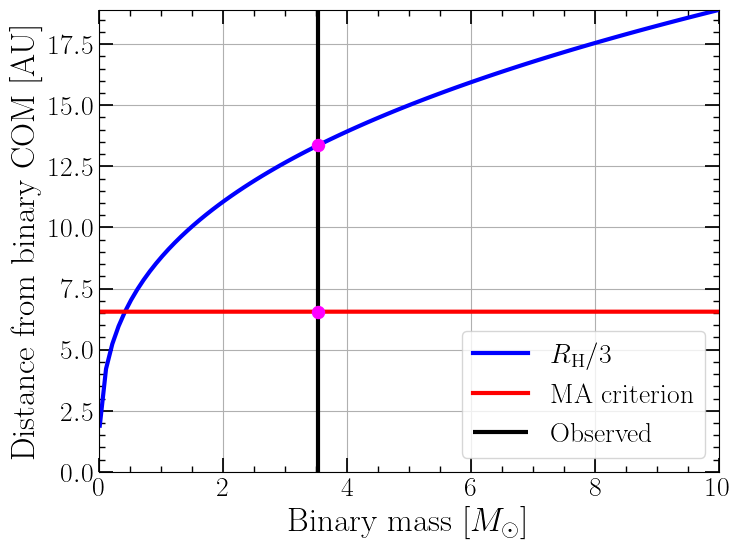

In [3]:
def hill_radius(mass_low, mass_high, semimajor_axis, eccentricity):
    """Calculates the Hill sphere radius for a low-mass object orbiting a high-mass object"""
    return semimajor_axis * (1 - eccentricity) * (mass_low / (3 * (mass_low + mass_high)))**(1/3)


def MA_criterion(a_in, e_out, i_mut, m_bin, m_3):
    return 2.8 * a_in * (1 - e_out)**(-1) * (1 - 0.3 * i_mut.value_in(units.deg) / 180) * ((1 + m_3 / m_bin ) * ((1 + e_out) / np.sqrt(1 - e_out)))**(2/5)


binary_mass_array = np.linspace(0.01, 10, 100)  # Solar masses

# Stability of the disk is between an inner radius of <long equation> and outer radius of 1/3 * R_hills
hill_radii = hill_radius(binary_mass_array, SMBH_MASS.number, SMBH_ORBITAL_RADIUS.value_in(units.AU), SMBH_ECCENTRICITY)
upper_limit = hill_radii / 3
lower_limit = MA_criterion(BINARY_SEPARATION.number, SMBH_ECCENTRICITY, BINARY_INCLINATION, binary_mass_array, DISK_MASS.number)

measured_upper = hill_radius((PRIMARY_MASS + SECONDARY_MASS).number, SMBH_MASS.number, SMBH_ORBITAL_RADIUS.value_in(units.AU), SMBH_ECCENTRICITY) / 3
measured_lower = MA_criterion(BINARY_SEPARATION.number, SMBH_ECCENTRICITY, BINARY_INCLINATION, (PRIMARY_MASS + SECONDARY_MASS).number, DISK_MASS.number)

print(measured_lower, measured_upper)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(binary_mass_array, upper_limit, label=r'$R_{\rm H} / 3$', color='blue', linewidth=3)
ax.plot(binary_mass_array, lower_limit, color='red', label=r'MA criterion', linewidth=3)
ax.scatter([(PRIMARY_MASS + SECONDARY_MASS).number, (PRIMARY_MASS + SECONDARY_MASS).number], [measured_upper, measured_lower], color='magenta', zorder=5, s=75)
ax.vlines((PRIMARY_MASS + SECONDARY_MASS).number, 0, np.max(upper_limit), color='black', label='Observed', linewidth=3)
ax.set_xlabel(r'Binary mass [$M_{\odot}$]')
ax.set_ylabel('Distance from binary COM [AU]')
ax.set_xlim(0, np.max(binary_mass_array))
ax.set_ylim(0, np.max(upper_limit))
ax.legend()
ax.grid()
plt.show()


0
Initializing a binary around a black hole.


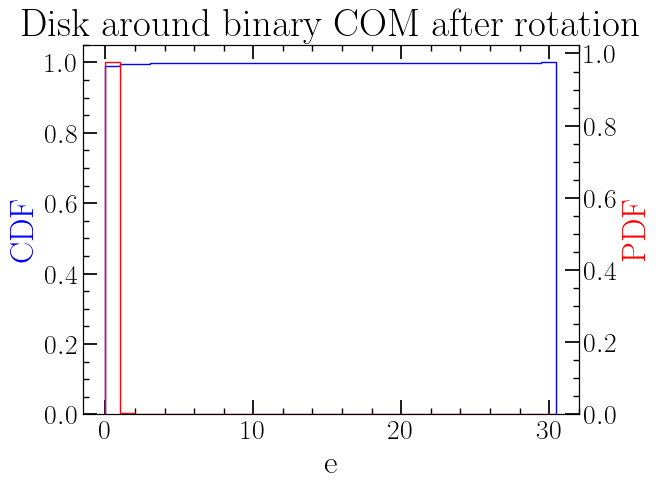

100
Initializing a binary around a black hole.


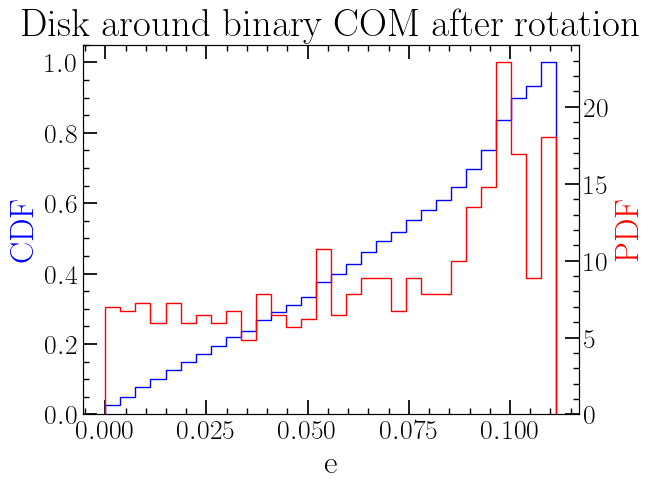

200
Initializing a binary around a black hole.


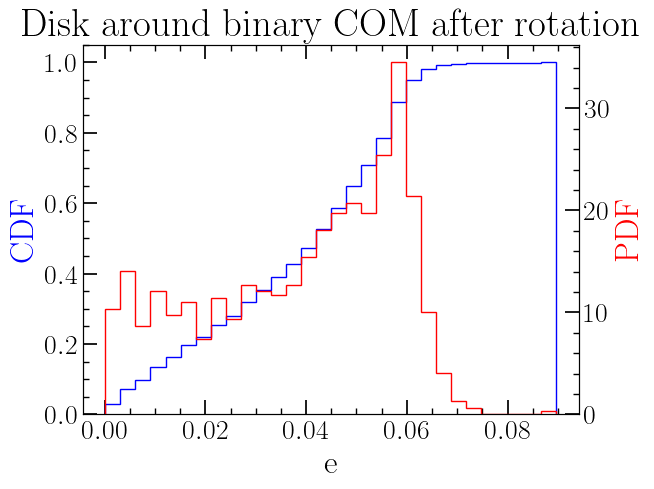

300
Initializing a binary around a black hole.


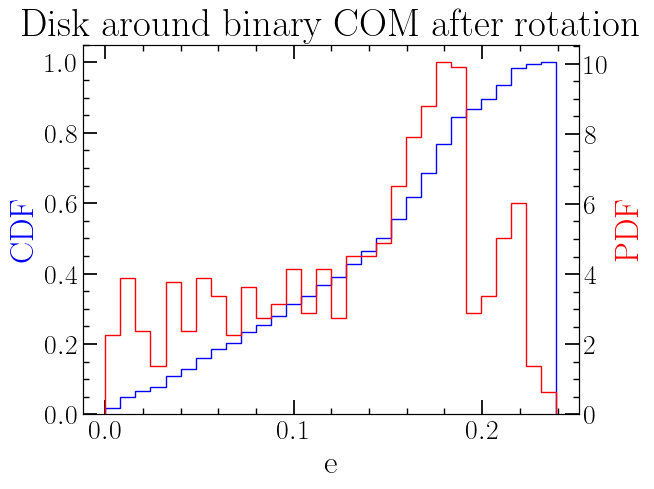

400
Initializing a binary around a black hole.


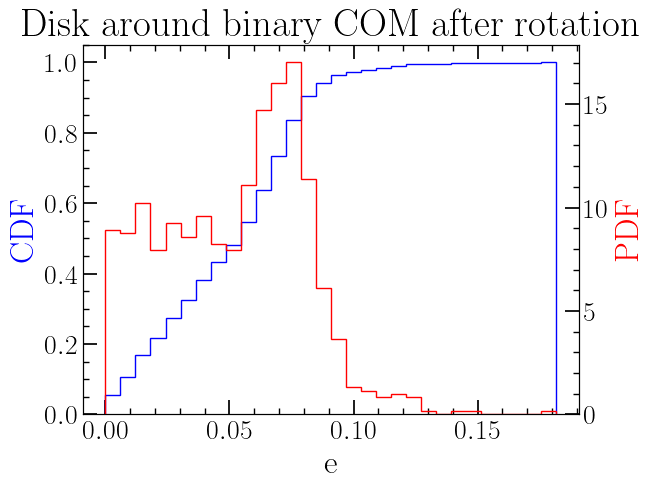

500
Initializing a binary around a black hole.


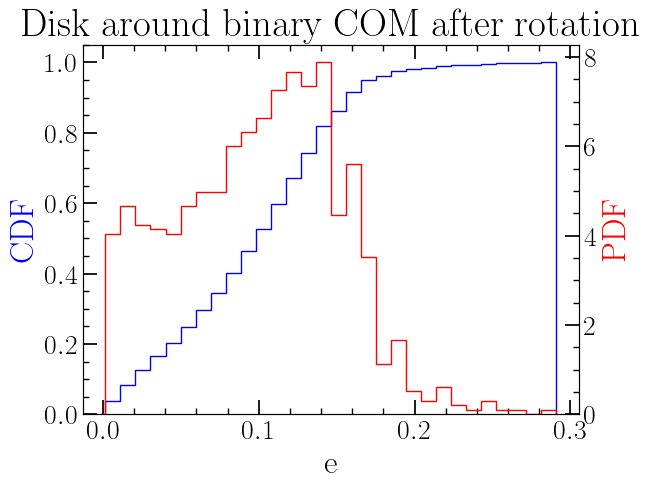

600
Initializing a binary around a black hole.


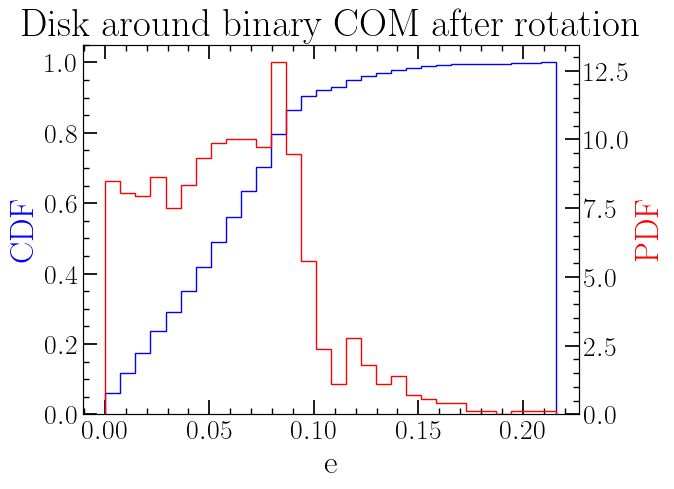

700
Initializing a binary around a black hole.


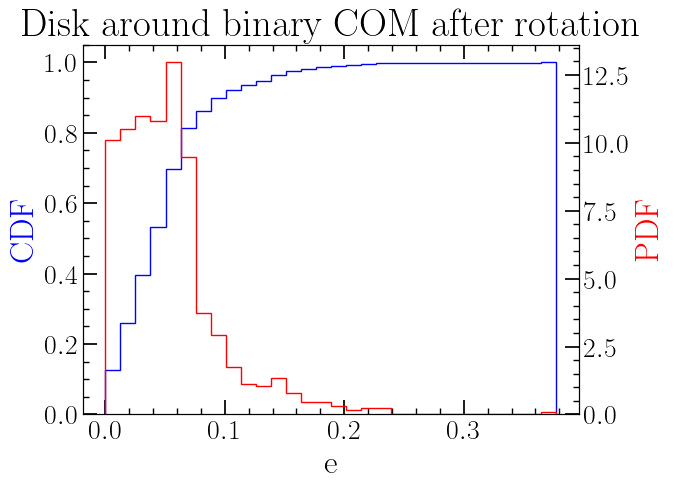

800
Initializing a binary around a black hole.


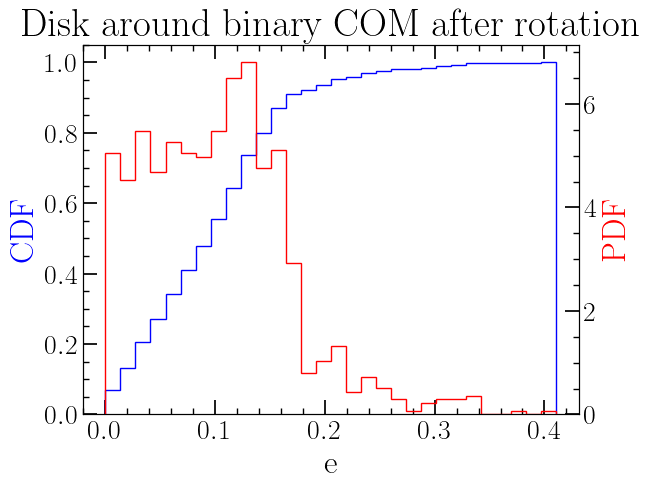

900
Initializing a binary around a black hole.


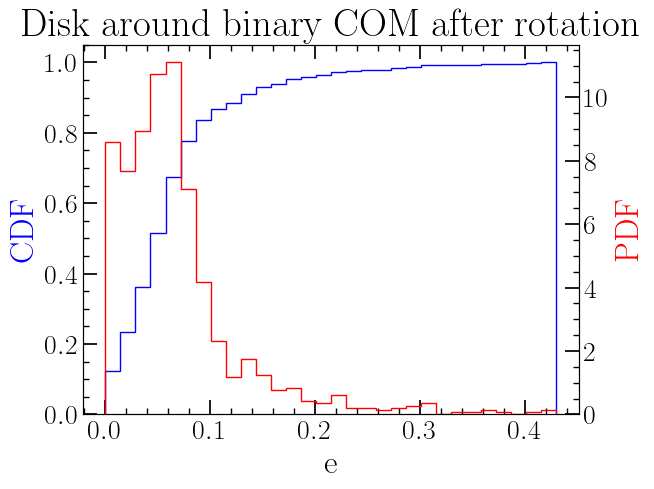

In [30]:
from make_system import SystemMaker
from plotter import get_com, get_com_vel
from amuse.lab import Particles, Particle
from amuse.ext.orbital_elements import get_orbital_elements_from_binaries

outer_semimajor_axis = 44 * 1e-3 | units.parsec
outer_eccentricity = 0.32
orbiter_masses = [2.8 | units.MSun, 0.73 | units.MSun]
inner_semimajor_axis = 1.59 | units.AU
mutual_inclination = 102.55 | units.deg
inner_eccentricity = 0.45
arg_of_periapse = 311.75 | units.deg
smbh_mass = 4.297e6 | units.MSun
disk_mass = 1.16e-6 | units.MSun
n_sph_particles = 1000

# r = 50
dr = 0.001

for r in range(0, 1000, 100):
    print(r)
    inner_radius = r | units.AU
    outer_radius = r + dr | units.AU

    ShaiHulud = SystemMaker(smbh_mass,
                            orbiter_masses,
                            outer_semimajor_axis,
                            outer_eccentricity,
                            inner_semimajor_axis,
                            mutual_inclination,
                            inner_eccentricity,
                            arg_of_periapse,
                            inner_radius,
                            outer_radius,
                            disk_mass,
                            n_sph_particles)  # Shai Hulud is the Maker

    smbh_and_binary, disk, converter = ShaiHulud.make_system()

    binary = smbh_and_binary[np.logical_or(smbh_and_binary.name == 'primary_star', smbh_and_binary.name == 'secondary_star')]

    if len(binary) == 1:
        com = binary
    else:
        com = Particle()
        com.position = get_com(binary)
        com.velocity = get_com_vel(binary)
        com.mass = binary[0].mass + binary[1].mass

    fig, ax = plt.subplots()
    _, _, _, eccs, _, incs, _, _ = get_orbital_elements_from_binaries(com, disk, G=constants.G)
    ax2 = ax.twinx()
    ax.hist(eccs, density=True, histtype="step", cumulative=True, bins=30, label='CDF', color='blue')
    ax2.hist(eccs, density=True, histtype="step", bins=30, label='PDF', color='red')
    ax.set_ylabel('CDF', color='blue')
    ax2.set_ylabel('PDF', color='red')
    ax.set_xlabel('e')
    plt.title('Disk around binary COM after rotation')
    plt.show()
